In [ ]:
l

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.8.2


# Creating Data to view and fit

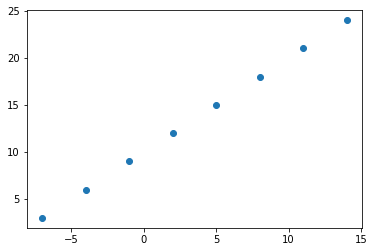

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(x, y);

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
# Turn our numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(x), dtype=tf.float32)
Y = tf.cast(tf.constant(y), dtype=tf.float32)

input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape
   

(TensorShape([]), TensorShape([]))

## Steps in modeling with tensorflow

1. **Creating a model**- define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our function how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model**- letting the model try to find patterns between X & y (features and labels)




In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics = ["mae"]
)

#. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 0s 472ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction with out model
y_pred = model.predict([17.0])

y_pred  

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within ecah of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for logner) or on more data (give the model more examples to learn from).



In [ ]:
# Let's rebuild our model

#1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)



In [ ]:
# Remind ourselves of the data

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Rebuild model again

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=.0001),
              metrics = ["mae"])

model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 892ms/step - loss: 12.9513 - mae: 12.9513
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 12.9086 - mae: 12.9086
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8660 - mae: 12.8660
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 12.8237 - mae: 12.8237
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7812 - mae: 12.7812
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7388 - mae: 12.7388
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 12.6962 - mae: 12.6962
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 12.6543 - mae: 12.6543
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6124 - mae: 12.6124
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 12.5692 - mae: 12.5692
Epoch 11/100
1/1 [==============================]

In [ ]:
# Let's see if we can make another to improve our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = .01),
              metrics = ["mae"])
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8482 - mae: 11.8482
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1529 - mae: 11.1529
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4547 - mae: 10.4547
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 9.7511 - mae: 9.7511
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0391 - mae: 9.0391
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3156 - mae: 8.3156
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5774 - mae: 7.5774
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.9147 - mae: 6.9147
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9004 - mae: 6.9004
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - los

In [ ]:
  # Let's remind ourselves of the data
  X, Y

  model.predict([17.0])

  #Learning Rate is most important hyperparaemter of many different neural networks

array([[26.86859]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is: 

'''
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...
'''

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?


In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

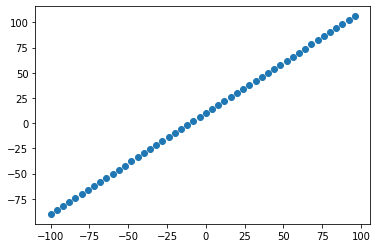

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)


### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is 10-15% of the data available
* **Test set**- the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have

len(X)


50

In [ ]:
# split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of data)
y_train = y[:40] 

X_test = X[40:] # last 10 are testing samples (20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)



(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

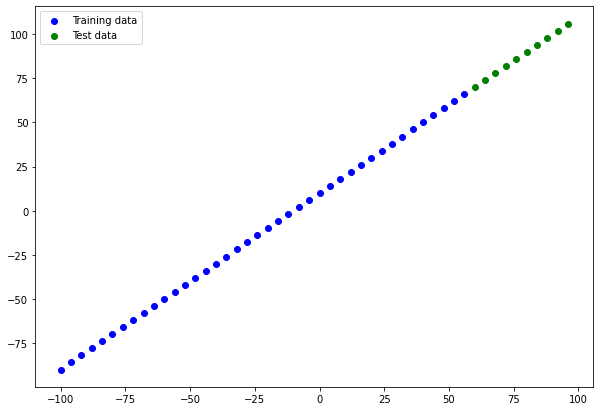

In [ ]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
#plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Test data")
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

#1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
#3. Fit the model
#model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)


### Visualizing the model

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ff2e6273710>>

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")
#2. compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or paramaters from other models during **transfer learning**)

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose = 0)


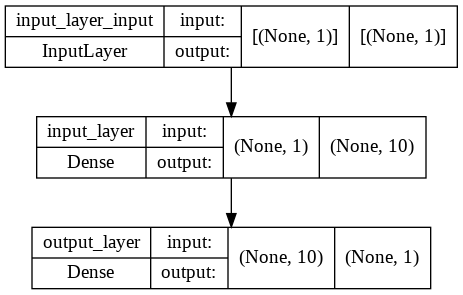

In [ ]:
from tensorflow.keras.utils import plot_model 

plot_model(model=model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' vs. 'y_pred' (ground truth versus your model's prediction). 

In [ ]:
# Make some predictions 
y_pred = model.predict([X_test])
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality,  in the future it is a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test, 
                     test_labels=y_test,
                     predictions=y_pred):
  """ 
  Plots training data, test data and compares predictions to ground truth
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Test Data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predicted Data")
  #Show the legend
  plt.legend();


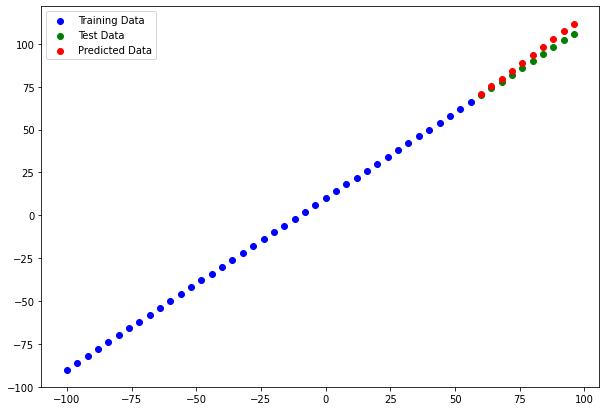

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions=y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 97ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true =y_test, 
                                     y_pred = tf.constant(y_pred))
mae 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calculate mae
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [ ]:
# Calcualte the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                   y_pred = tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, 
                                        y_pred= tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it - evaluate it -> ...
```

1. Get more data - get more examples for model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. `model_4` - 2 layers, with adams for 100 epochs
5.  `model_5` - 2 layers, with adams for 500 epochs

**Build`model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])
#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

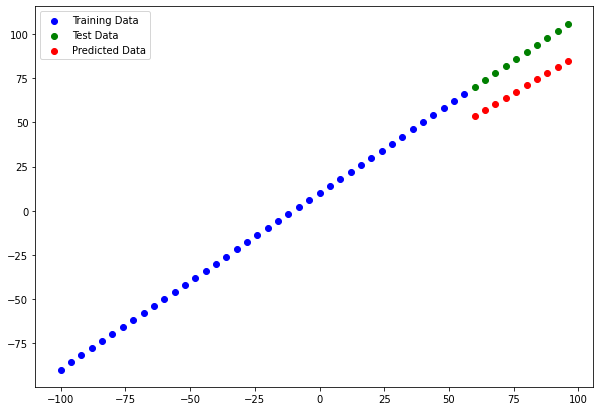

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [ ]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

** Build `model_2` 

* 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_test, axis = -1), y_test, epochs = 200)


Epoch 1/200
1/1 [==============================] - 0s 278ms/step - loss: 59.0248 - mse: 3536.0774
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 148.4391 - mse: 22578.6094
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 83.5589 - mse: 7099.4844
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 51.7520 - mse: 2716.1040
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 27.9170 - mse: 810.5120
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 82.4357 - mse: 6909.5107
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 70.2162 - mse: 5009.0303
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 31.6752 - mse: 1013.5376
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 90.4177 - mse: 8393.9238
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 79.3416 - mse: 6399.4883
Epoch 11/200
1/1 [============

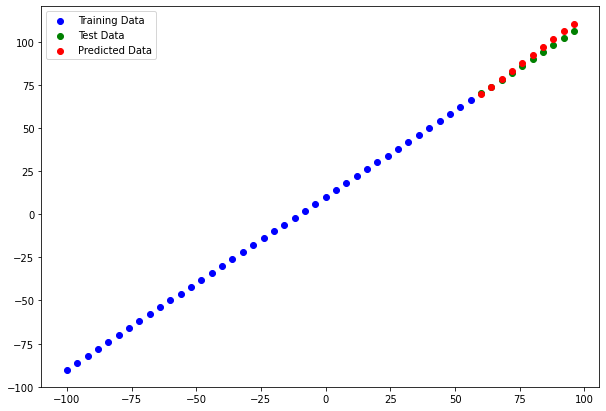

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=2.0869827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.5180955>)

**Build `model_3`**
*2 layers, trained for 500 epochs

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_test, axis = -1), y_test, epochs = 500)


Epoch 1/500
1/1 [==============================] - 0s 268ms/step - loss: 104.7332 - mae: 104.7332
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 42.7417 - mae: 42.7417
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 90.5647 - mae: 90.5647
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 67.9525 - mae: 67.9525
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 23.1261 - mae: 23.1261
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 117.5937 - mae: 117.5937
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 78.0397 - mae: 78.0397
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 56.4628 - mae: 56.4628
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 11.8751 - mae: 11.8751
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 83.1408 - mae: 83.1408
Epoch 11/500
1/1 [==============================

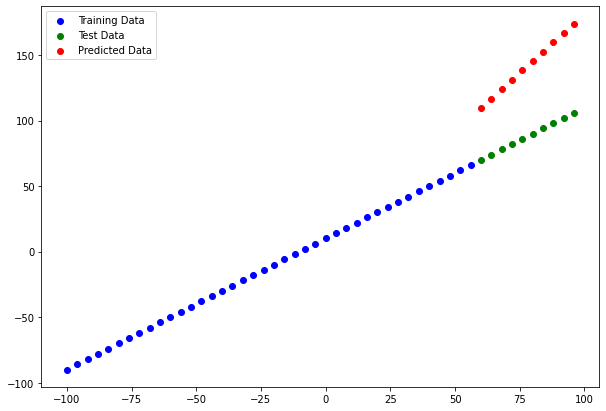

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=53.785572>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2975.0603>)

### Comparing the results of our experiments
We've run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,2.086983,6.518095
2,model_3,53.785572,2975.060303


In [ ]:
model_2.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                20        
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments 

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're runing lots of experiments.

Luckily, there are tools to help us!

Resource: As you build more models, you'll want to look into using:

* Tensorboard - a component of the tensorflow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard).

## Saving our models

Saving our models allows us to use them outside of Google Collab (or wherever they were trained) such as in a web application or a mobile app

There are 2 main formats we can save our model's too:

1. The SavedModel format
2. the HDF5 format

In [ ]:
# Save a model using the SavedModel format
model_2.save("best_model_SavedModel_format")


In [ ]:
# Save a model using the HDF5 format

model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                20        
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format

loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                20        
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check if h5 is same as model 2

loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds = model_2.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download". 
2. Use code (see the cell below)  
3. Save it to google drive by connecting Google Drive and copying it there (see 2nd code cell below)

In [ ]:
# Download a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorflowCourse


In [ ]:
!ls /content/drive/MyDrive/TensorflowCourse

best_model_HDF5_format.h5


### A Larger Example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (labels and features)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View x
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:

# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(y_train)


(1070, 1070)

In [ ]:

# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
insurance_model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 9702.670

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units
2. Train for longer

In [ ]:
# Trial 1
tf.random.set_seed(42)
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)


In [ ]:
insurance_model_1.evaluate(X_test, y_test)


((1070, 6), (1070,))

In [ ]:
# Trial 2
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
history = insurance_model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200)


In [ ]:
insurance_model_2.evaluate(X_test, y_test)


9/9 [==============================] - 0s 4ms/step - loss: 8613.0361 - mae: 8613.0361


[8613.0361328125, 8613.0361328125]

Text(0.5, 0, 'epochs')

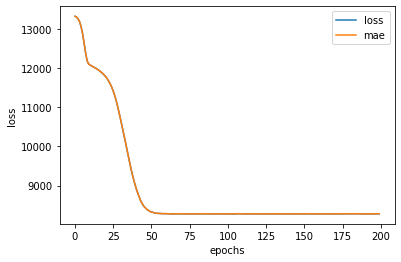

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare out data, we can borrom a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region",])
)

# Create X and y 
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
y_train.shape, X_train_normal.shape

((1070,), (1070, 11))

Data has been normalized and one hot encoded. Now let's build a neural network on it and see how it goes. 

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
insurance_model_3.fit(tf.expand_dims(X_train_normal, axis = -1), y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13345.1553 - mae: 13345.1553
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.5186 - mae: 13342.5186
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.4600 - mae: 13336.4600
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13324.1416 - mae: 13324.1416
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13302.5088 - mae: 13302.5088
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.4561 - mae: 13268.4561
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13219.1201 - mae: 13219.1201
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13151.7490 - mae: 13151.7490
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 13063.6299 - mae: 13063.6299
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12952.17

In [ ]:
# Evaluate our model

insurance_model_3.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 8622.1045 - mae: 8622.1045


[8622.1044921875, 8622.1044921875]

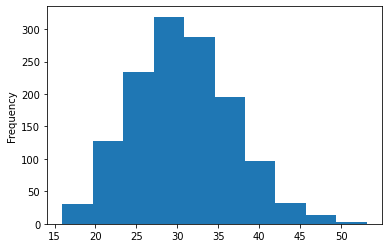

In [ ]:
X["bmi"].plot(kind="hist")

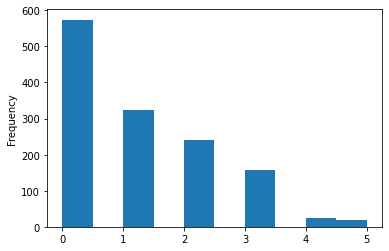

In [ ]:
X["children"].plot(kind="hist")